# Computing the predictions

It's time to see how your net performs on unseen `test` data. We will divide the tutorial in 3 parts depending on whether you want to:
* Predict filepaths contained in a [dataset split .txt file](#Predicting-a-datasplit-txt-file)
* Predict [local images](#Predicting-local-files)
* Predict [url images](#Predicting-image-urls)

**Note** Parameters in UPPERCASE letters must be changed by the user if needed.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import os
import json
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.models import load_model

from imgclas.data_utils import load_image, load_data_splits
from imgclas.test_utils import predict
from imgclas import paths, plot_utils, utils

# User parameters to set
TIMESTAMP = '2021-11-03_Lab_All_CopasVasos_All_reg'                       # timestamp of the model
MODEL_NAME = 'final_model.h5'                           # model to use to make the prediction

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)
    
# Load the model
model = load_model(os.path.join(paths.get_checkpoints_dir(), MODEL_NAME), custom_objects=utils.get_custom_objects(), compile=False)

W1105 08:49:31.164269 140004082857792 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1105 08:49:31.166605 140004082857792 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1105 08:49:31.168298 140004082857792 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

## Predicting a datasplit txt file

Here we are going to compute the predictions and save them into a `.json` file to retireve them later. 

In [2]:
cd ..

/srv/image-classification-tf


In [3]:
paths.get_ts_splits_dir()

'/srv/image-classification-tf/models/2021-11-02_Lab_Madrid_CopasVasosAll_reg/dataset_files'

In [3]:
SPLIT_NAME = 'copasVasosVolRevisado'                          # data split to use (nombre del .txt que vas a leer, en este caso test)
# conf['general']['images_directory'] = '/media/ignacio/Datos/datasets/semillas/datasets/RJB'  # custom the absolute path to the images directory, if needed

# Load the data
X, y = load_data_splits(splits_dir=paths.get_ts_splits_dir(),
                        im_dir=conf['general']['images_directory'],
                        split_name=SPLIT_NAME)

# Predict
pred_result = predict(model, X, conf, filemode='local')

# Save the predictions
pred_dict = {'filenames': list(X),
             'pred_value': pred_result.tolist()}
if y is not None:
    pred_dict['true_value'] = y.tolist()

pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME))
with open(pred_path, 'w') as outfile:
    json.dump(pred_dict, outfile, sort_keys=True)

Loading copasVasosVolRevisado data...
62/62 [==============================] - 28s 454ms/step


## Predicting local files

#### Predict a single local image

In [8]:
import os
os.path.isdir(r'C:\Users\Miriam\Desktop')

False

In [18]:
!pwd

/srv/image-classification-tf


1/1 [==============================] - 4s 4s/step


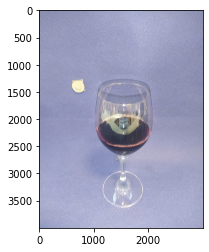

86.1113052368164


In [13]:
# FILEPATH = r"C:\Users\Miriam\Desktop\9221_45.jpg" # no se pueden leer archivos desde local en la maquina virtual, hay que subirlos aqui
FILEPATH = '/srv/datos/Laboratorio/Madrid/copa Char/Fondo azul/Est_Mad_J_Char_75_nd_f_az_con_me_sup1.jpg'

pred_value = predict(model, FILEPATH, conf)#, filemode='local')

plt.imshow(load_image(FILEPATH))#, filemode='local'))
plt.show()
print('{}'.format(pred_value[0]))

#### Predict a list of local images

3/3 [==============================] - 6s 2s/step


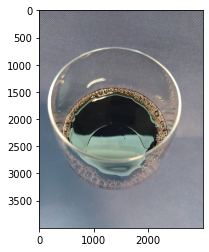

[81.9%] 300mL
[13.3%] 250mL


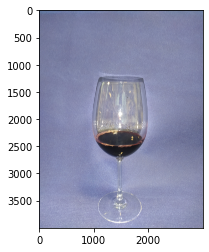

[47.3%] 50mL
[41.6%] 100mL


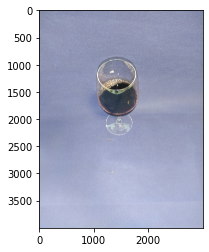

[98.3%] 300mL
[0.9%] 250mL


In [8]:
FILEPATHS = ['/srv/datos/Laboratorio/Madrid/copa Bor/Fondo azul/Est_Mad_J_Bor_275_nd_nf_az_sin_ce_sup.jpg',
             '/srv/datos/Laboratorio/Madrid/copa Bor/Fondo azul/Est_Mad_J_Bor_75_nd_f_az_sin_me_cen.jpg',
             '/srv/datos/Laboratorio/Madrid/copa Bor/Fondo azul/Est_Mad_J_Bor_200_nd_f_az_sin_me_sup.jpg']
     
pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='local')

for i, im_path in enumerate(FILEPATHS):
    plt.figure(i)
    plt.imshow(load_image(im_path, filemode='local'))
    plt.show()
    for j in range(pred_lab.shape[1]):
        print('[{:.1f}%] {}'.format(pred_prob[i, j] * 100, class_names[pred_lab[i, j]]))

#### Predict a list of local images belonging to the same observation

In this case all the images belong to the same observation so we wan to average the predictions among all of them.

In [16]:
FILEPATHS = ['/media/ignacio/Datos/datasets/semillas/datasets/RJB/Euphorbia_terracina_JC1355_SEM_COL.jpg',
             '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Campanula_lusitanica_lusitanica_LM4461_SEM_COL.jpg',
             '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Arbutus_unedo_RJB03_1_COL.jpg']
     
pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='local', merge=True)

for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

3/3 [==============================] - 0s 141ms/step
[17.0%] Genus Sambucus
[14.6%] Genus Chelidonium
[13.8%] Genus Cardamine
[8.9%] Genus Zygophyllum
[6.2%] Genus Papaver


## Predicting image urls

#### Predict a single url

1/1 [==============================] - 1s 967ms/step


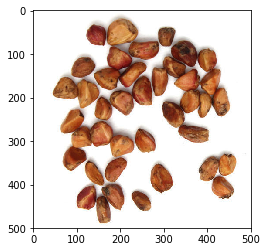

[47.5%] Genus Medicago
[19.5%] Genus Prunus
[14.6%] Genus Onobrychis
[7.5%] Genus Geranium
[3.2%] Genus Abutilon


In [17]:
FILEPATH = 'https://4.imimg.com/data4/PC/DF/MY-15664163/rose-flower-seed-500x500.jpg'

pred_lab, pred_prob = predict(model, FILEPATH, conf, top_K=TOP_K, filemode='url')

plt.imshow(load_image(FILEPATH, filemode='url'))
plt.show()
for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

#### Predict a list of urls

2/2 [==============================] - 1s 261ms/step


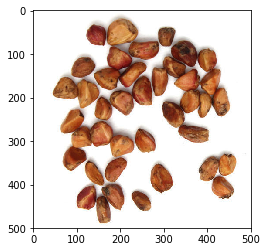

[49.8%] Genus Medicago
[16.0%] Genus Prunus
[13.4%] Genus Onobrychis
[7.3%] Genus Geranium
[3.4%] Genus Cerastium


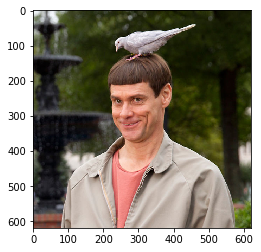

[21.4%] Genus Crupina
[9.2%] Genus Silybum
[7.4%] Genus Ailanthus
[7.2%] Genus Cnicus
[6.2%] Genus Carthamus


In [18]:
FILEPATHS = ['https://4.imimg.com/data4/PC/DF/MY-15664163/rose-flower-seed-500x500.jpg',
             'https://m.media-amazon.com/images/M/MV5BMTkyODFhNjctY2RiNi00ZGRmLWJhOTktNjM5OGQ2YTFiOWU2L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNTc3MjUzNTI@._V1_.jpg']

pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='url')

for i, im_path in enumerate(FILEPATHS):
    plt.figure(i)
    plt.imshow(load_image(im_path, filemode='url'))
    plt.show()
    for j in range(pred_lab.shape[1]):
        print('[{:.1f}%] {}'.format(pred_prob[i, j] * 100, class_names[pred_lab[i, j]]))

#### Predict a list of local images belonging to the same observation

In this case all the images belong to the same observation so we wan to average the predictions among all of them.

In [19]:
FILEPATHS = ['https://4.imimg.com/data4/PC/DF/MY-15664163/rose-flower-seed-500x500.jpg',
             'https://m.media-amazon.com/images/M/MV5BMTkyODFhNjctY2RiNi00ZGRmLWJhOTktNjM5OGQ2YTFiOWU2L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNTc3MjUzNTI@._V1_.jpg']

pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='url', merge=True)

for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

2/2 [==============================] - 0s 218ms/step
[24.9%] Genus Medicago
[12.8%] Genus Onobrychis
[12.4%] Genus Crupina
[8.0%] Genus Silybum
[7.8%] Genus Ailanthus
